# CNN을 이용하여 MNIST 분류

1) 데이터 준비

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

(train_input, train_target), (test_input, test_target)=mnist.load_data()
train_input=train_input.reshape(60000, 28, 28, 1)
test_input=test_input.reshape(10000, 28, 28, 1)
train_input=train_input.astype(np.float32)/255.0
test_input=test_input.astype(np.float32)/255.0

2) 모델 설계



1.  models 클래스 : Sequential 함수
*   순차적으로 층을 쌓아 모델을 만드는 경우
*   대부분 신경망이 이 구조에 해당
*   add 함수로 층을 쌓아 신경망 설계

---

2.   layers 클래스 : Conv2D, MaxPooling2D, Flatten, Dense 함수

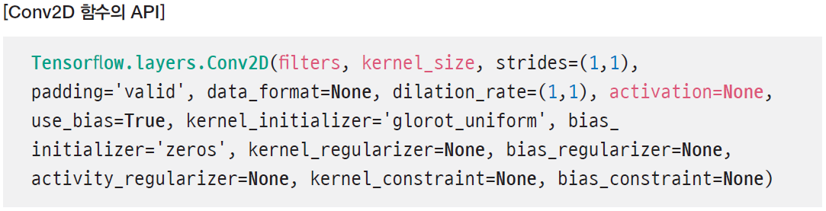

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 10816)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               1384576   
                                                      

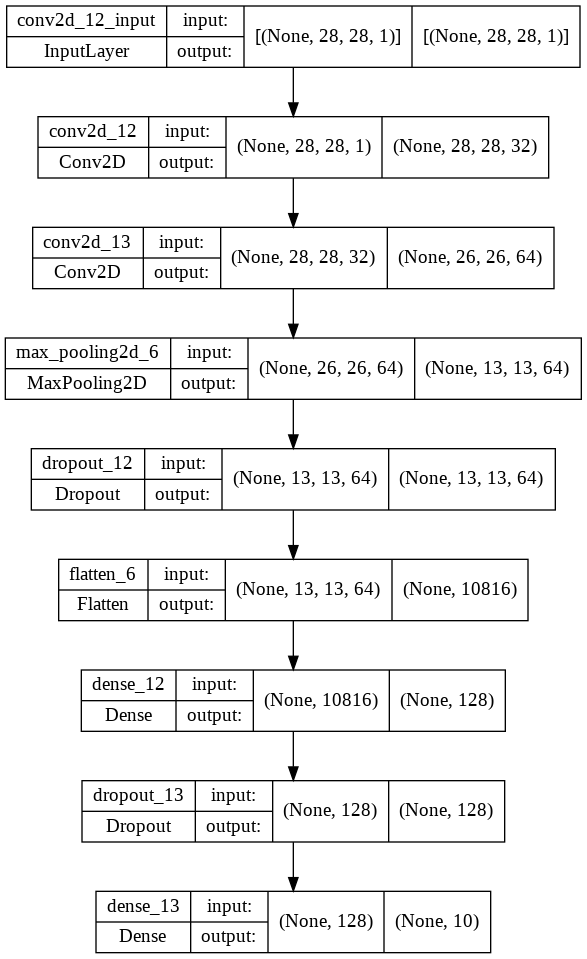

In [ ]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1))) # 신경망의 첫 번째 층은 input_shape 변수로 입력 크기 지정
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())                                                # 합성곱층과 풀링층을 통해 추출한 특징을 입력으로 사용하기 위해
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))                          # 다중 분류의 출력층에 적용하는 활성화 함수는 소프트맥스 함수
cnn.summary()                                                     # 모델 정보를 출력하는 메서드               
tf.keras.utils.plot_model(cnn, show_shapes=True)                  # 모델 구성을 그림으로 표현

## 모델 구조 C-C-P-FC-FC
-> C-C-P-dropout-FC-dropout-FC 인데 dropout은 규제 기법이고 별개의 층으로 볼 수 없으므로 5개의 층으로 이루어진 C-C-P-FC-FC 구조임



*   실행 시간을 절약하기 위해 런타임 유형을 GPU로 변경



In [ ]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics='accuracy')                                   # 정수로 된 타깃값을 사용해서 크로스 엔트로피 계산하도록 loss 설정
hist=cnn.fit(train_input, train_target, batch_size=128, epochs=12, validation_data=(test_input, test_target), verbose=2)    # fit 메서드는 History 클래스 객체를 반환 (훈련과정에서 계산한 지표 : 손실과 정확도)

Epoch 1/12
469/469 - 5s - loss: 0.2359 - accuracy: 0.9283 - val_loss: 0.0519 - val_accuracy: 0.9844 - 5s/epoch - 11ms/step
Epoch 2/12
469/469 - 4s - loss: 0.0819 - accuracy: 0.9760 - val_loss: 0.0408 - val_accuracy: 0.9865 - 4s/epoch - 9ms/step
Epoch 3/12
469/469 - 4s - loss: 0.0615 - accuracy: 0.9815 - val_loss: 0.0324 - val_accuracy: 0.9893 - 4s/epoch - 9ms/step
Epoch 4/12
469/469 - 4s - loss: 0.0496 - accuracy: 0.9849 - val_loss: 0.0330 - val_accuracy: 0.9887 - 4s/epoch - 9ms/step
Epoch 5/12
469/469 - 4s - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0293 - val_accuracy: 0.9910 - 4s/epoch - 9ms/step
Epoch 6/12
469/469 - 4s - loss: 0.0389 - accuracy: 0.9875 - val_loss: 0.0295 - val_accuracy: 0.9900 - 4s/epoch - 9ms/step
Epoch 7/12
469/469 - 4s - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0281 - val_accuracy: 0.9911 - 4s/epoch - 9ms/step
Epoch 8/12
469/469 - 4s - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.0282 - val_accuracy: 0.9912 - 4s/epoch - 9ms/step
Epoch 9/12
469/469 - 4s

# 경사하강법 : 최적화된 가중치를 찾기 위해 여러 번 반복함
>
전체 데이터 사이즈가 크기 때문에 학습과정에서 작은 사이즈의 데이터 집합 이용
(데이터의 크기가 크면 메모리가 많이 필요)

* epoch : Number of epochs to train the model
>
1 epoch은 전체 학습 데이터가 신경망에 적용되어 forward, backward 1번 통과한 상태
> 
epoch 증가 -> 학습 회수 증가 -> 최적의 가중치 찾을 확률 올라감, 손실값(loss) 낮아짐 -> 과적합 가능성

*   batch_size : Number of samples per gradient update
> 
가중치 업데이트에 사용하는 샘플 수
>
batch_size가 너무 크면 한 번에 처리할 데이터의 양이 많고 학습 속도 느림
>
batch_size가 너무 작으면 적은 데이터를 대상으로 가중치 업데이트하게 되어 가중치 업데이트가 자주 발생하고 훈련이 불안정해짐


In [ ]:
res=cnn.evaluate(test_input, test_target, verbose=0)
print("정확도", res[1]*100)

정확도 99.22999739646912


정확도와 손실함수

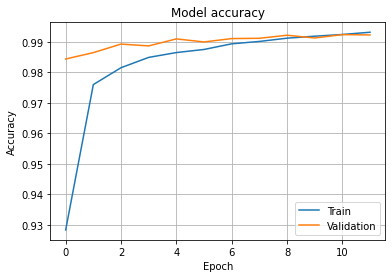

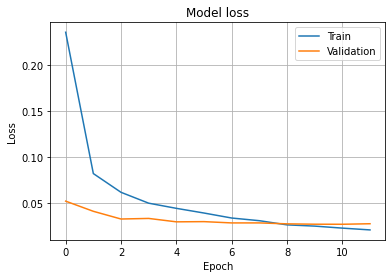

In [ ]:
import matplotlib.pyplot as plt

# 정확도 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

모델이 잘 훈련되었는지 판단하기 위해 손실함수 값을 확인

In [ ]:
preds=cnn.predict(test_input[0:1])  # 선택된 원소가 하나이더라도 전체 차원이 유지되어야 함 (1,28,28,1) 크기
print(preds)                        # 각 10개의 클래스에 대한 예측 확률

[[6.2215209e-15 4.2450644e-11 3.0426252e-11 6.4586270e-09 1.2837741e-10
  1.5699063e-14 7.8326950e-17 1.0000000e+00 2.3401365e-13 4.4318618e-10]]


In [ ]:
print(test_input[0].shape)

(28, 28, 1)


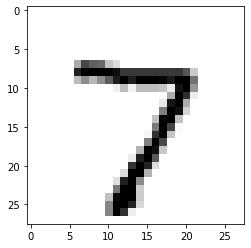

In [ ]:
plt.imshow(test_input[0].reshape(28,28), cmap='gray_r')
plt.show()